Utilizando o dataset flights do seaborn, faça as previsões e testes que foram feitos em aula com o RandomForest

In [5]:
import seaborn as sns
import pandas as pd

random_state = 90

flights = sns.load_dataset("flights")
flights.tail(20)

,year,month,passengers
124,1959,May,420
125,1959,Jun,472
126,1959,Jul,548
127,1959,Aug,559
128,1959,Sep,463
129,1959,Oct,407
130,1959,Nov,362
131,1959,Dec,405
132,1960,Jan,417
133,1960,Feb,391


In [6]:
flights['date'] = pd.to_datetime(flights['year'].astype(str) + '-' + flights['month'].astype(str) + '-01')
flights.head()

,year,month,passengers,date
0,1949,Jan,112,1949-01-01
1,1949,Feb,118,1949-02-01
2,1949,Mar,132,1949-03-01
3,1949,Apr,129,1949-04-01
4,1949,May,121,1949-05-01


<Axes: title={'center': 'Monthly Number of Passengers'}, xlabel='date'>

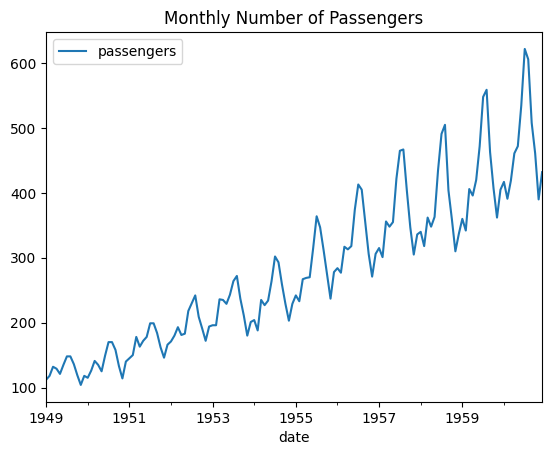

In [7]:
flights.plot(x='date', y='passengers', kind='line', title='Monthly Number of Passengers')

Treine o modelo e exiba em um gráfico

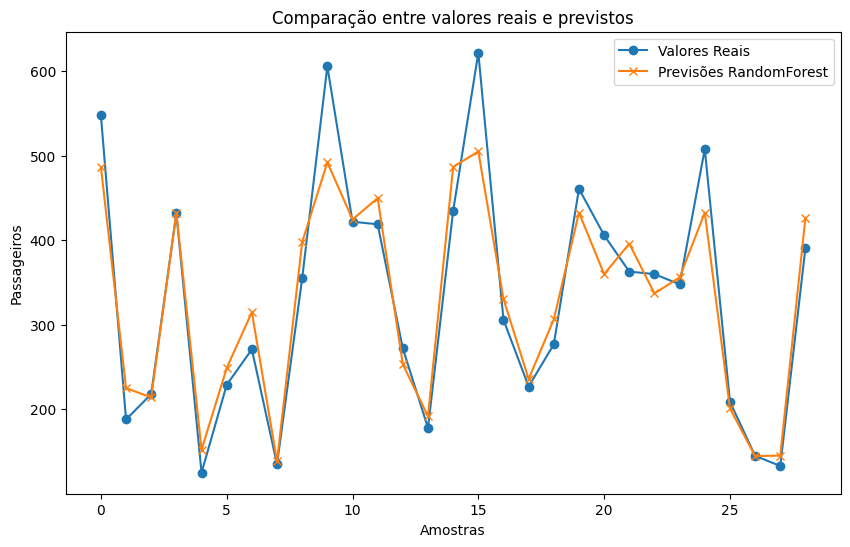

In [12]:
X = flights[['date']]
y = flights['passengers']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=random_state)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Valores Reais', marker='o')
plt.plot(y_pred, label='Previsões RandomForest', marker='x')
plt.title('Comparação entre valores reais e previstos')
plt.xlabel('Amostras')
plt.ylabel('Passageiros')
plt.legend()
plt.show()

Teste os erros do modelo

In [13]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")

MAE: 31.78
MSE: 1865.82
RMSE: 43.20
R²: 0.90


Teste outros parâmetros com o `param_grid`

In [14]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

Fitting 3 folds for each of 81 candidates, totalling 243 fits
Melhores parâmetros encontrados:
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


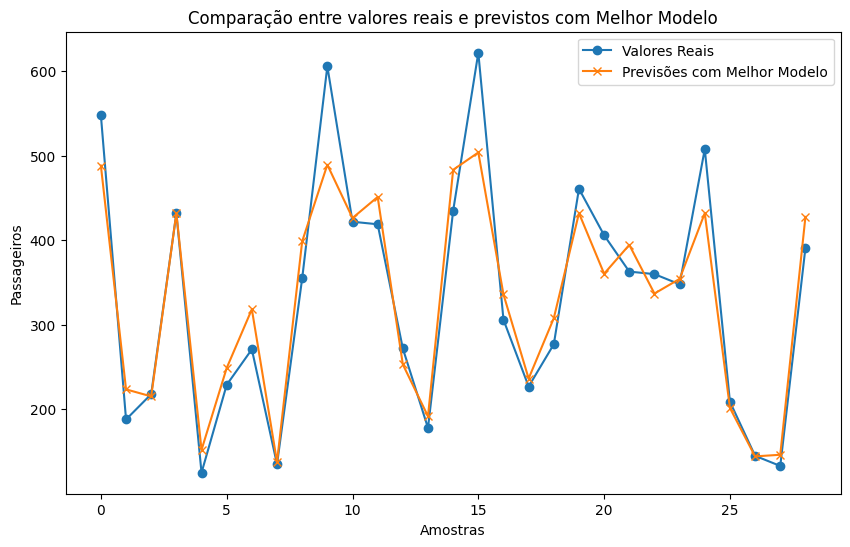


MAE (Modelo sem Spending + GridSearch): 32.0948
MSE (Modelo sem Spending + GridSearch): 1908.3244
R² (Modelo sem Spending + GridSearch): 0.9016


In [ ]:
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
print("Melhores parâmetros encontrados:")
print(grid_search.best_params_)
best_rf = grid_search.best_estimator_
y_pred_best = best_rf.predict(X_test)
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Valores Reais', marker='o')
plt.plot(y_pred_best, label='Previsões com Melhor Modelo', marker='x')
plt.title('Comparação entre valores reais e previstos com Melhor Modelo')
plt.xlabel('Amostras')
plt.ylabel('Passageiros')
plt.legend()
plt.show()

best_rf = grid_search.best_estimator_
y_pred_best = best_rf.predict(X_test)
mae_best = mean_absolute_error(y_test, y_pred_best)
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print()
print(f"MAE GridSearch): {mae_best:.4f}")
print(f"MSE GridSearch): {mse_best:.4f}")
print(f"R² GridSearch): {r2_best:.4f}")